In [29]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt

Note that in the last few notebooks we have been really grappling with 2 different ideas. The first is about finding the singed area of orientated polygons, whose vertices satisfy some kind of paramateisationi. The second idea is about constructing paths that around edges. 

To help us along the journey, we also introduced some new data structures notebook, as well as new geometrical structures such as oriented polygonal splines and cyclic orientated polygonal splines. Through this we have been able to expand our idea of orientated sides into orientated edges. 

In a way, to me at least, it feels alot we alot we are dancing an exciting idea posed in notebook [TBA]: If, over a given interval, we were to keep on increasing the number of orientated sides or edges that satisfy a parameterisation of of something like a parabola or hyperbola, (or any kind of polynomial) would we end up being able to to calculate the signed area of this paramaterised object? 

But at the same time, we also need be really careful here. Because what exactly are we saying? It doesn't make sense taht these sides somehow becomes points. They just get closer oriented spline to approximate a curve. We are talking about practicality of approximation 

Before going any further, let's bring in some functions we have been working with so far: 

In [30]:
def compute_cross_product_from_two_points(points_list):
    c = points_list[0][0] * points_list[1][1] - points_list[0][1] * points_list[1][0]
    return(c)

def compute_signed_area_from_two_points(points_list):
    c = compute_cross_product_from_two_points(points_list)
    signed_area = c / 2
    return(signed_area)

def compute_signed_area_using_meisters_formula(points_list, is_cyclic):

    total_signed_area = 0
    for each_point in range(len(points_list) - 1):
        signed_area = compute_signed_area_from_two_points([points_list[each_point], points_list[each_point + 1]])
        total_signed_area = total_signed_area + signed_area
    
    if is_cyclic:
        final_signed_area = compute_signed_area_from_two_points([points_list[-1], points_list[0]])
        total_signed_area = total_signed_area + final_signed_area
        
    return(total_signed_area)

Now let's return to exploing the parabola: $ y = x^2$. We visualise it as a curve (and we haven't not defined a curve) and exp, note that we can construct an orientated edge between two points that meet the parameterisation. We dould create few points, and joins between them can create more points and it will close. If we construct lots of edges it will get closer. We need to be careful that we are not saying that we can create an infinite amount of edges. That's doesn't make sense. That the edges somehow morph into points on a curve. We haven't definted a curve so that makes no sense. Let's look at plotting more edges and getting closer. 

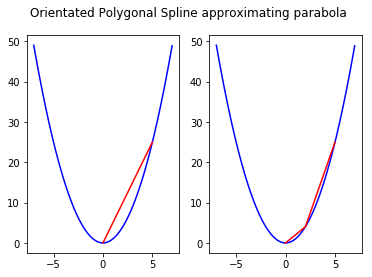

In [31]:

x2 = np.arange(start=-7, stop=7, step=.01)
y2 = x2^2

points_for_plotting_2 = np.array([[0,0], [5,25]])
x3 = [e[0] for e in points_for_plotting_2]
y3 = [e[1] for e in points_for_plotting_2]

points_for_plotting = np.array([[0,0], [2,4], [5, 25]])
x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

fig, axs = plt.subplots(1, 2)
fig.suptitle('Orientated Polygonal Spline approximating parabola')

axs[0].plot(x2, y2, 'b')
axs[0].plot(x3, y3, 'r')
axs[1].plot(x2, y2, 'b')
axs[1].plot(x1, y1, 'r')

And we can also see this as being cyclic and having an area we deal with:

Suppose we have k points, and they each meet the paraterisation for the parabolabol aen  know with many edges cosntructed we get an approximation cure, more than fewer $\overrightarrow{A_{k-1} A_k}$. It also means that can find the singed area for any 2 points, and let's gneralise this. Let's generalise that statement. If we think of this as having $k$ edges, as many we can imagine, what the signed area of a single edge be $s(\overrightarrow{A_{k-1}A_k})$ We have a function, but let's calculat it manually to  remind us of the signed area

In [32]:
k = sp.symbols('k')
e = (k * (k -1)^2 - (k^2) *(k - 1)) / 2

In [33]:
e.factor()

-k*(k - 1)/2

So the signed area is $A_k \equiv \frac{k(k+1)}{2}$ is defined this like this. What makes this so interesting is that if look at the sequence of numbers, which is the sequence of signed areas for for over a given interval, let's try the first num20 and also visualise them, interesting because we see the shape of a parabola emerge

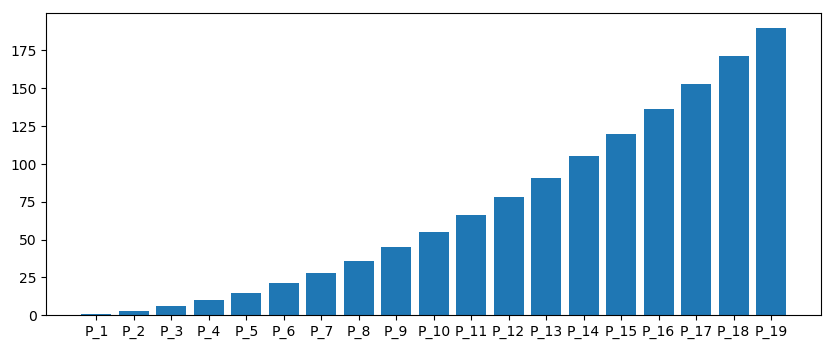

In [34]:
m = [(i * (i + 1))/2 for i in range(1,20)]
l = ["P_" + str(i) for i in range(1,20)]
fig=plt.figure(figsize=(10,4), dpi= 100)
p = plt.bar(l, m)

We are seeing here is a signed area of a parabola constructed with edges increases in a particular sequence: the sequence of triangular numbers (Reference: A000217). So for a parabola, the formula for a signed area increases in a sequence of triangular numbers as we get closer to some value, $k$ 

So what is want to add all the edges: how do we calculate a total signed area for all k. For the first 10 eges, we coul sum some. And we know the signed area is 165. But what about generalising for $n$ terms generated as orietnated edges what is. Well the formula for summing $n$ terms That would involve how do we find the sum of $n$ pyradmidal numbers?

$$ P_{n-1} =  \frac{(n-1)n(n+1)}{6} $$

Let's check out what these applying this formula for values 1 to 20 would look like

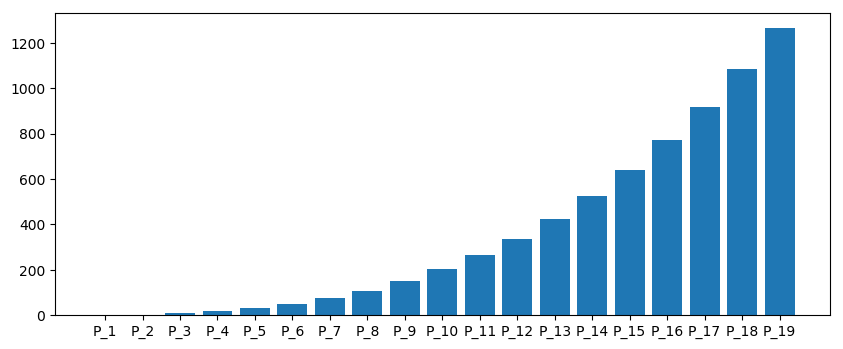

In [35]:
m = [((i + 1) * i * (i + 1))/6 for i in range(1,20)]
l = ["P_" + str(i) for i in range(1,20)]
fig=plt.figure(figsize=(10,4), dpi= 100)
p = plt.bar(l, m)

Note that I am not include a proof of why the summatino of triangluar numbers comes out to $ P_{n-1} =  \frac{(n-1)n(n+1)}{6} $ , just to keep on track. Note it is straight forward and can be done by assuming it to be true for a base case applying induction. 

What this tells us however tells us is that to derive the sum of signed areas of $n$ oriented edges whose points satisfy the parameterisation of $y=x^2$, we can use the very same formula that calculates $n$ pyramidal (also called tetrahedal numbers.  IN same way as we derived formulas from the Meister formula to understand areas of triangles on parabolas, we are now moving towards calculting the area of these shapes. 

This leads to an interesting question: can we use this formula to approximate the area of a sector, of we divide that sector into n parts, and then apply our formula? Let's visualise the problem:

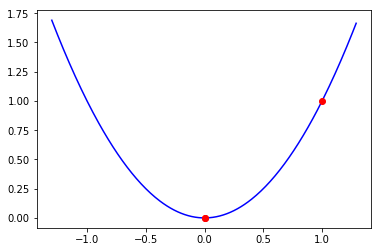

In [36]:
fig, ax = plt.subplots()
x2 = np.arange(start=-1.3, stop=1.3, step=.01)
y2 = x2^2

points_choice = np.array([[0,0], [1,1]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'ro')

If we divide our sector (between the red dots above) into $n$ parts, we can thing of the points $\frac{1}{n}, \frac{2}{n}, \frac{3}{n} \ldots \frac{k}{n}  $

We instead of $k$ and $k - 1$ we will have $\frac{k}{n}$ and $\frac{k - 1}{n}$ and we will compute the signed area, but using our  

In [37]:
k, n = sp.symbols('k, n')
p1 = np.array([(k - 1)/n, (k- 1)^2/n^2])
p2 = np.array([k/n, k^2/n^2])

In [38]:
r = compute_signed_area_from_two_points([p2, p1]).factor()
r

-k*(k - 1)/(2*n**3)

This formula looks similiar to our formula for triangle numbers, $\frac{k(k+1)}{2}$. In fact, let's rewrite it as a product in which one of the compoentns of the product is this formula: $$ { \frac{1}{n^3} \cdot \frac{k(k + 1)}{2}}$$


If this is the formula of an orientated edge substitute $\frac{(n-1)n(n+1)}{6}$ for $\frac{k(k + 1)}{2}$. When we simplify it is possible to put the result into this form: 

$$ \frac 16 (1-\frac {1}{n^2}) $$

So we now have a formula for telling us the signed area of a sector of a parabolic arc between 0 and 1. What is itneresting here is to consider what happens as $n$ gets larger: the expression get's closer to 1/6. 

To make this even clearer, let suppose that $\frac{1}{n^2}$ be equivalent to some variable $h$, and rewrite the formula as:  $s(\frac 16 (1-h^2)$, just a polynomial expression in $h$ where the  limiting operation can be replaced by a truncation, which is purely algebraic and works also over finite fields.

Again, we need to be careful here. We are not saying that the signed area of of a parabolic sector between 0 and 1 is 1/6. We are saying that as the number of orientated edges grows that create the parabolic sector, the number get's closer to 1/6. 

It is a bit limiting for us to only consider the signed area of an area between 0 and 1. It would be good to extend this so we can look at different kinds of intervals. Let's do that now. 

We will keep $[0,0]$ as one point part of our interval of the parabolic arc, but instead of 1, let's generalise this to some point $a$. We can think of this as simply scaling each value, so if we take our original values or $\frac{1}{n}, \frac{2}{n}, \frac{3}{n} \ldots \frac{k}{n}  $ and simply multiplied each by a constant, our interval can be easily estended and will look something $\frac{a}{n}, \frac{2a}{n}, \frac{3a}{n} \ldots \frac{ka}{n}$



In [40]:
k, n, a = sp.symbols('k, n, a')
p1 = np.array([k * a/n, (k * a)^2/n^2])
p2 = np.array([((k - 1)* a)/n, ((k - 1) * a)^2/n^2])
r = compute_signed_area_from_two_points([p1, p2])
r.simplify()

-a**3*k*(k - 1)/(2*n**3)

Again, we can rewrite this formula for an orientated edge in such a way to isolate the product of the formula of triangular numbers and  our this answer as the formula for triangula numbers.  : $$ { \frac{a^3}{n^3} \cdot \frac{k(k + 1)}{2}}$$

And from there, it no problem to extend this to course, recall that we can can also extend this to sum of multiple edges between 0 and by noting this would be equivalent to: 

$$  \sum\limits_{k=1}^n{ \frac{a^3}{n^3} \cdot \frac{k(k + 1)}{2}} = \frac{a^3}{n^3} \sum\limits_{k=1}^n{  \cdot \frac{k(k + 1)}{2}} =   \frac{a^3}{n^3}\frac{(n-1)n(n+1)}{6}    $$

And we end up with a formula to compute the sum oriented adges that satisfy the parameterisation of a parabola. Note that we can of course subsitute for

$$ \frac{a^3}{n^3} \cdot \frac 16 (1-\frac {1}{n^2}) $$ 

as our final expression is 


Finally, note that, although we have assumed that $a \gt 0$, we could apply exact same sequence of mathematical steps, and assume this is not the case. We simply get a differnt sign in the signed area:

In [41]:
r = compute_signed_area_from_two_points([p2, p1])
r.simplify()

a**3*k*(k - 1)/(2*n**3)

We are slowly but sure heading towards a more generalised formula of of a signed area of a parabolic sector. But what we really want is to be able to consider the area between some general point $a$ and some some general point $b$. So let's go through the same thing again. Note what our points would look lik thing $a + \frac{b - a}{n}, a +  \frac{2(b - a)}{n},  a +  \frac{3(b - a)}{n} \ldots \frac{k(b - a)}{n}$. The points $a$ is an arbitrary starting piont, $b$ is a value above $a$, and scalign to ensure beyond 0 and 1. 

So a general point in this setting would look like the following: 

$$   A_k=\left[a+\frac {k(b-a)}{n},\left(a+\frac {k(b-a)}{n}\right)^2\right]  $$

The algebra might get a little messy here, so we will let $c = b - a$


In [42]:
k, n, a, b, c = sp.symbols('k, n, a b c')
p1 = np.array([(a + ((k * c)/n)), ((a + ((k * c)/n)))^2])
p2 = np.array([(a + (((k - 1) * c)/n)), ((a + (((k - 1) * c)/n)))^2])
r = compute_signed_area_from_two_points([p1, p2])
r.simplify()

(a*n + c*k)*(a*n + c*(k - 1))*(-c*k + c*(k - 1))/(2*n**3)

In [43]:
# JG - need to redo and simplify......

Let's finish off by exploing one great idea ecall we arrived at the area approaching 1/6 way back when we wanted formulate a ARCHIMEDES

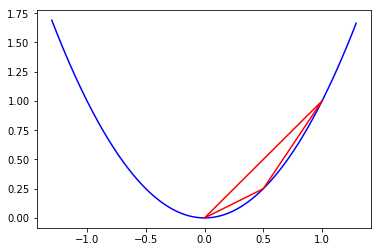

In [44]:
fig, ax = plt.subplots()
x2 = np.arange(start=-1.3, stop=1.3, step=.01)
y2 = x2^2

points_choice = np.array([[0,0], [1/2,1/4], [1,1]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')

Let's go back to back our Meisters formula, is there are relationship between a orientated triangle constructed . what is the maximum area we could put on a parabola: 

In [45]:
s = compute_signed_area_using_meisters_formula([[0, 0], [1/2, 1/4], [1, 1]], is_cyclic=False)
s

1/8

and thea area of maximum size of triangle is 4/3 times the area of the triangle, whch was was something a formula of Archimedes. We will return to it later on


Let's return to this formula we have found for the sum of a parabola

$$ P_{n-1} =  \frac{(n-1)n(n+1)}{6} $$ 

It's just an algebraic expression. We can manipulate this different ways. Fo example, what is we hwantd to have two integers, $m$ and $n$ representint to signed areas of a parabola derived from the above formula. What is is the cifference between the signed areas? Let's assume that  $m \le n$:

In [46]:
n, m = sp.symbols('n, m')

a1 = ((m - 1) * m * (m + 1)) / 6
a2 = ((n - 1) * n * (n + 1)) / 6


(a1 - a2).factor()

(m - n)*(m**2 + m*n + n**2 - 1)/6

INterestingly, the same formula gives us a 

In [47]:
(a2 - a1).factor()

-(m - n)*(m**2 + m*n + n**2 - 1)/6

We also note,  orientated edges2 comprised of points $m, m+1$ and $m + 2$

In [48]:
a1 = (m * (m + 1) / 2)
a2 = ((m + 1) * (m + 2) / 2)

In [49]:
(a1 + a2).simplify()

(m + 1)**2

In a way, we expect elegant patterns to start emerging